In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Leemos el archivo
SaleRecord_DF=pd.read_csv("exoplanets.csv")

#Nuestros campos de interes
DF= SaleRecord_DF.filter(items=['NAME', 'TEFF','MASS','A','DENSITY','R','STAR','MSTAR','RSTAR','BINARY'])


#descartando los binarios == 0
DFB=DF.query('BINARY !=0')

#Veamos los primeros 10 archivos que arroja
DFB.head(10)

#------------------------------

/srv/conda/envs/notebook/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4,5,10,11,17,18,23,24,26,27,30,33,38,39,44,45,50,51,56,57,62,63,70,71,73,74,79,80,81,82,88,89,95,96,105,106,109,110,115,116,117,124,125,130,131,137,143,144,149,150,159,160,161,162,172,173,174,179,180,182,188,189,195,196,201,202,205,206,211,212,217,218,223,224,229,230,235,236,241,242,247,248,253,254,259,260,265,266,268,269,270,271,273,278,279,284,285,290,291,294,295,301,302,304,305,310,311) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY
14,Kepler-20 b,5466.0,0.026665,0.045370,6.50,0.170247,Kepler-20,0.912,0.944000,1.0
20,Kepler-1512 b,4372.0,0.005187,0.131390,NaN,0.105000,Kepler-1512,0.730,0.670000,1.0
28,Kepler-1642 b,5355.0,0.030477,0.099421,NaN,0.285000,Kepler-1642,0.880,0.840000,1.0
29,Kepler-11 c,5663.0,0.009124,0.106909,0.66,0.255816,Kepler-11,0.961,1.065000,1.0
32,Kepler-705 b,3722.0,0.015673,0.231978,NaN,0.188000,Kepler-705,0.530,0.510000,1.0
33,HD 1237 b,5536.0,3.374800,0.494668,NaN,NaN,HD 1237,0.900,0.858011,1.0
36,Kepler-186 c,3788.0,0.006367,0.057411,NaN,0.111418,Kepler-186,0.478,0.472000,1.0
40,Kepler-80 f,4613.0,0.006093,0.017386,NaN,0.110000,Kepler-80,0.720,0.640000,1.0
58,Kepler-186 d,3788.0,0.009349,0.086083,NaN,0.124790,Kepler-186,0.478,0.472000,1.0
64,Kepler-967 b,5178.0,0.018036,0.103279,NaN,0.210000,Kepler-967,0.840,0.800000,1.0


In [51]:
#la masa en unidades de la tierra
DFB["MASSE"] = (DFB["MASS"]/5.972e24)*1.898e27

#--------------------------------

#Radios Terrestres
DFB['RE']=(DFB['R']/6.371e6)*6.991e7

#--------------------------------

#luminosidad de la estrella 
DFB['LUM']=(4*np.pi*DFB['R']*DFB['TEFF']*5.670373e-8 )

#--------------------------------

#limites de habitabilidad

#Limite interior
DFB['ri']=((((0.72-2.7619e-5*(DFB['TEFF']-5780))-(3.8095e-9*(DFB['TEFF']-5780)**2)))*np.sqrt(DFB['LUM'])) 

#Limite exterior
DFB['r0']=((((1.77-1.3786e-4*(DFB['TEFF']-5780))-(1.4286e-9*(DFB['TEFF']-5780)**2)))*np.sqrt(DFB['LUM']))

DFB.head(10)


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY,MASSE,RE,LUM,ri,r0
14,Kepler-20 b,5466.0,0.026665,0.045370,6.50,0.170247,Kepler-20,0.912,0.944000,1.0,8.474449,1.868148,0.000663,0.018754,0.046689
20,Kepler-1512 b,4372.0,0.005187,0.131390,NaN,0.105000,Kepler-1512,0.730,0.670000,1.0,1.648581,1.152182,0.000327,0.013589,0.035472
28,Kepler-1642 b,5355.0,0.030477,0.099421,NaN,0.285000,Kepler-1642,0.880,0.840000,1.0,9.686029,3.127350,0.001087,0.024108,0.060293
29,Kepler-11 c,5663.0,0.009124,0.106909,0.66,0.255816,Kepler-11,0.961,1.065000,1.0,2.899875,2.807110,0.001032,0.023235,0.057386
32,Kepler-705 b,3722.0,0.015673,0.231978,NaN,0.188000,Kepler-705,0.530,0.510000,1.0,4.981042,2.062954,0.000499,0.016986,0.045723
33,HD 1237 b,5536.0,3.374800,0.494668,NaN,NaN,HD 1237,0.900,0.858011,1.0,1072.567046,NaN,NaN,NaN,NaN
36,Kepler-186 c,3788.0,0.006367,0.057411,NaN,0.111418,Kepler-186,0.478,0.472000,1.0,2.023553,1.222607,0.000301,0.013178,0.035359
40,Kepler-80 f,4613.0,0.006093,0.017386,NaN,0.110000,Kepler-80,0.720,0.640000,1.0,1.936402,1.207048,0.000362,0.014205,0.036679
58,Kepler-186 d,3788.0,0.009349,0.086083,NaN,0.124790,Kepler-186,0.478,0.472000,1.0,2.971158,1.369341,0.000337,0.013946,0.037421
64,Kepler-967 b,5178.0,0.018036,0.103279,NaN,0.210000,Kepler-967,0.840,0.800000,1.0,5.732265,2.304364,0.000775,0.020466,0.051565


In [52]:
#Filtro probabilidad ser rocosos

DFR=DFB.query('DENSITY >=5')
DFR.head(10)

,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY,MASSE,RE,LUM,ri,r0
14,Kepler-20 b,5466.00,0.026665,0.045370,6.50000,0.170247,Kepler-20,0.912,0.944,1.0,8.474449,1.868148,0.000663,0.018754,0.046689
200,Kepler-10 b,5627.00,0.014282,0.016757,8.80000,0.126327,Kepler-10,0.895,1.056,1.0,4.539182,1.386206,0.000507,0.016297,0.040309
700,HD 80606 b,5572.51,3.890540,0.447343,7.94618,1.029000,HD 80606,0.958,0.980,1.0,1236.477716,11.291381,0.004086,0.046379,0.114965
765,Kepler-10 c,5627.00,0.054117,0.239656,5.00000,0.209653,Kepler-10,0.895,1.056,1.0,17.199274,2.300556,0.000841,0.020995,0.051929
1011,Kepler-97 b,5779.00,0.010694,0.036125,5.44000,0.132037,Kepler-97,0.940,0.980,1.0,3.398761,1.448863,0.000544,0.016789,0.041275
1592,Kepler-48 d,5194.00,0.015100,0.229818,5.08000,0.181997,Kepler-48,0.880,0.890,1.0,4.799029,1.997082,0.000674,0.019073,0.048021
1685,Kepler-14 b,6395.00,8.406430,0.080688,7.10000,1.136000,Kepler-14,1.512,2.048,1.0,2671.701966,12.465509,0.005177,0.050477,0.121209
1996,Kepler-19 b,5541.00,0.016594,0.084583,5.53257,0.197074,Kepler-19,0.936,0.850,1.0,5.273910,2.162524,0.000778,0.020262,0.050290
2238,Kepler-100 b,5825.00,0.023094,0.072684,14.25000,0.117763,Kepler-100,1.080,1.490,1.0,7.339685,1.292232,0.000489,0.015891,0.038995


In [53]:
#Filtro para planeas que están en zona de habitabilidad
DFH=DFB.query('ri < A < r0')
DFH.head(10)


,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY,MASSE,RE,LUM,ri,r0
14,Kepler-20 b,5466.0,0.026665,0.045370,6.500000,0.170247,Kepler-20,0.912,0.944,1.0,8.474449,1.868148,0.000663,0.018754,0.046689
40,Kepler-80 f,4613.0,0.006093,0.017386,NaN,0.110000,Kepler-80,0.720,0.640,1.0,1.936402,1.207048,0.000362,0.014205,0.036679
85,Kepler-553 b,5266.0,0.070758,0.048207,NaN,0.413000,Kepler-553,0.920,0.850,1.0,22.487963,4.531915,0.001550,0.028863,0.072453
171,Kepler-472 b,4996.0,0.030927,0.048077,NaN,0.287000,Kepler-472,0.850,0.780,1.0,9.829047,3.149297,0.001022,0.023631,0.060003
199,KELT-2 A b,6151.0,1.520640,0.054971,0.948085,1.286000,KELT-2 A,1.308,1.828,1.0,483.284447,14.111483,0.005636,0.053246,0.129031
200,Kepler-10 b,5627.0,0.014282,0.016757,8.800000,0.126327,Kepler-10,0.895,1.056,1.0,4.539182,1.386206,0.000507,0.016297,0.040309
227,Kepler-257 b,5180.0,0.021019,0.034913,NaN,0.232849,Kepler-257,NaN,1.037,1.0,6.680248,2.555089,0.000859,0.021554,0.054300
246,Kepler-424 b,5460.0,0.770225,0.043642,1.740000,0.890000,Kepler-424,1.010,0.940,1.0,244.790196,9.766112,0.003463,0.042865,0.106741
352,Kepler-1331 b,4508.0,0.003515,0.014979,NaN,0.094000,Kepler-1331,0.720,0.690,1.0,1.117014,1.031477,0.000302,0.013015,0.033764
356,Kepler-856 b,5535.0,0.564251,0.077403,NaN,0.830000,Kepler-856,0.960,0.930,1.0,179.328265,9.107722,0.003274,0.041569,0.103198


<AxesSubplot:xlabel='A', ylabel='TEFF'>

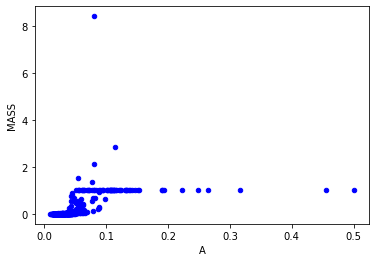

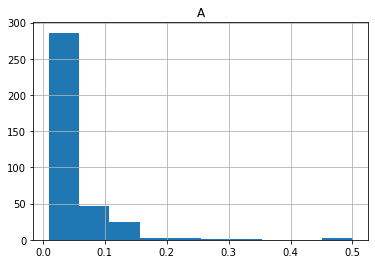

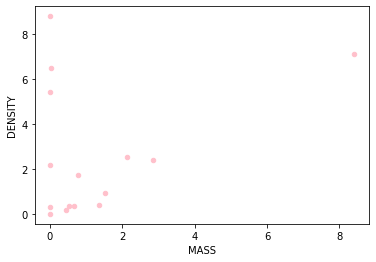

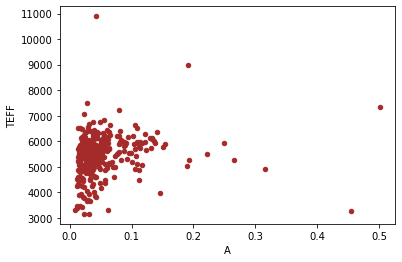

In [57]:
#Graficas
#La masa de las estrellas vs la distancia del planeta a su estrella
DFH.plot(kind='scatter',x='A',y='MASS',c='b') 

#Histograma de la distribución orbital.
DFH.hist('A') 

#Gráfica de masa vs densidad.
DFH.plot(kind='scatter',x='MASS',y='DENSITY',c='pink')

#Gráfica de distancia a la estrella vs temperatura efectiva.
DFH.plot(kind='scatter',x='A',y='TEFF',c='brown') 